In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [84]:
df_IN = df[df['job_country'] == 'India']
df_skills = df_IN.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [85]:
df_job_title_count = df_IN['job_title_short'].value_counts().reset_index(name='Job Count')
df_perc = pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')
df_perc['Percentage']=df_perc['skill_count']/df_perc['Job Count']*100

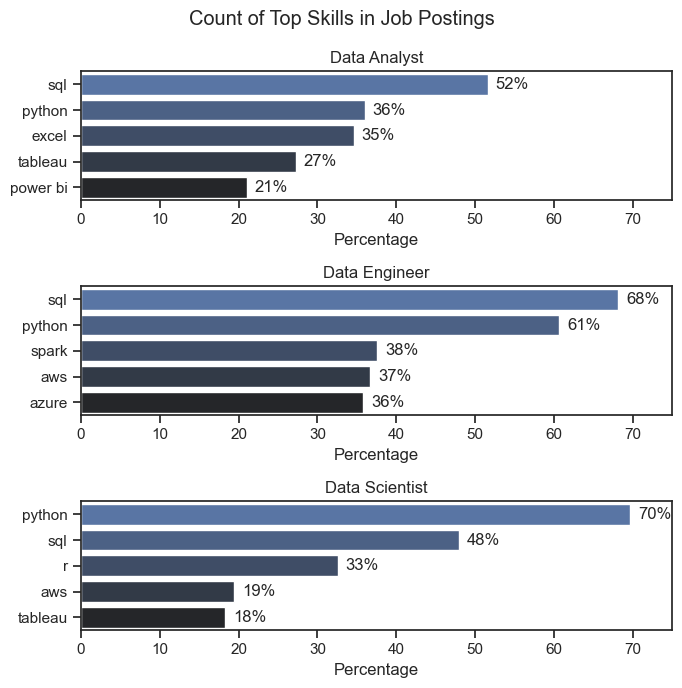

In [102]:
jobs = df_IN['job_title_short'].unique().tolist()
jobs = sorted(jobs[0:3])

fig,ax = plt.subplots(3,1)
sns.set_theme(style='ticks')

for i, job in enumerate(jobs):
    df_plot = df_perc[df_perc['job_title_short'] == job].head(5)
    sns.barplot(data=df_plot, x='Percentage', y='job_skills',ax=ax[i], hue='job_skills', palette='dark:b_r')
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,75)

    for n,val in enumerate(df_plot['Percentage']):
        ax[i].text(val+1,n,f'{val:.0f}%', va='center')

fig.suptitle('Count of Top Skills in Job Postings')
fig.set_size_inches((7,7))
fig.tight_layout()
